In [151]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

In [152]:
real_data = pd.read_csv("crab_age.csv")

synthetic_data = pd.read_csv("Finalized_gckm_syn.csv")

synthetic_data.drop(["Unnamed: 0"], axis = 1, inplace = True)

synthetic_data["Age"] = np.round(synthetic_data["Age"]).astype(int)

synthetic_data

,Weight,Diameter,Shucked Weight,Length,Height,Shell Weight,Age,Sex,Viscera Weight
0,41.698843,1.386346,16.222348,1.733412,0.478928,12.609553,11,M,8.388398
1,20.696747,1.039328,6.070421,1.386839,0.349111,6.913100,13,I,5.102811
2,26.844076,1.064998,13.710715,1.422959,0.393164,6.978751,8,F,6.013923
3,4.745291,0.779355,3.996753,0.987695,0.229850,0.611716,4,F,1.093130
4,0.056699,0.416515,0.028349,0.718618,0.090240,0.042524,4,I,0.042524
...,...,...,...,...,...,...,...,...,...
74046,37.050324,1.612500,14.597500,1.973778,0.566458,12.678027,15,I,7.810601
74047,15.669838,0.857072,7.122282,1.050973,0.280943,3.677568,5,F,3.020412
74048,17.663457,0.783859,8.449449,1.128365,0.248103,4.796131,6,I,4.027110
74049,0.056699,0.611428,0.028349,0.679041,0.196181,0.042524,3,I,0.042524


In [153]:
num_of_rows_for_aug = round(len(real_data)/2)
num_of_rows_for_aug

37026

In [154]:
augumented_data = synthetic_data.sample(n = num_of_rows_for_aug) #sample rows from synthetic dataset
augumented_data

,Weight,Diameter,Shucked Weight,Length,Height,Shell Weight,Age,Sex,Viscera Weight
13286,20.555464,1.021734,10.567108,1.345011,0.346221,5.470285,8,I,5.035281
56325,20.927682,0.901259,5.879427,1.164581,0.315922,5.213431,10,I,5.459281
3154,35.011010,1.111240,15.199029,1.582956,0.394216,9.929003,14,I,7.890491
4552,53.621789,1.512955,23.248882,1.878937,0.519342,14.728699,14,M,12.024660
59714,30.481353,1.191416,11.611804,1.436766,0.400907,10.034844,8,M,6.631803
...,...,...,...,...,...,...,...,...,...
36898,39.144121,1.256147,14.950754,1.662215,0.423860,12.894368,17,I,8.645396
67908,22.086034,0.883841,9.511350,1.086624,0.282419,4.045705,5,M,4.992282
1512,24.739965,0.946160,12.376681,1.374765,0.338661,6.794155,8,I,5.023284
72579,15.072232,0.935352,5.857448,1.227705,0.302683,4.956156,6,I,3.949840


<Axes: >

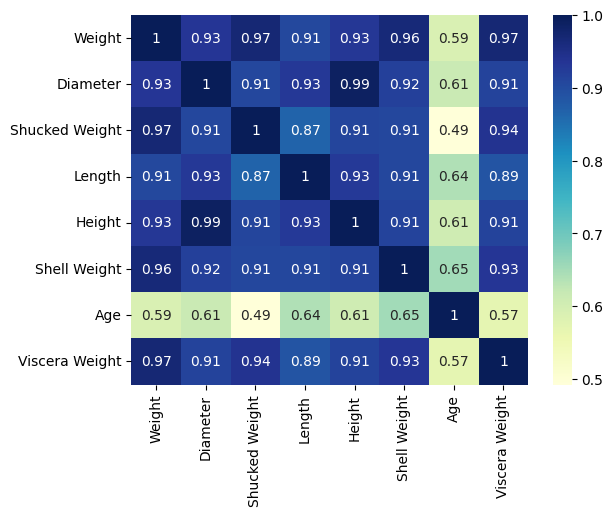

In [155]:
numeric_cols = augumented_data.select_dtypes(include=np.number).columns.tolist()
corr_matrix = augumented_data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', cbar=True)

In [156]:
real_data.drop(["id"],axis=1, inplace= True)

In [157]:
input_cols = real_data.columns[:-1]
input_cols

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

In [158]:
target = 'Age'
targets = real_data[target]
input_df = real_data[input_cols]
real_data.drop(columns=['Age'], inplace=True)

real_data

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395
...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607
74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774


In [159]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(real_data, targets, test_size=0.1, random_state=42)

X_val_copy = X_val.copy()
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()
y_val = y_val.copy()

In [160]:
target = 'Age'
augumened_targets = augumented_data[target]
augumented_data.drop(columns=['Age'], inplace=True)


augumented_data

,Weight,Diameter,Shucked Weight,Length,Height,Shell Weight,Sex,Viscera Weight
13286,20.555464,1.021734,10.567108,1.345011,0.346221,5.470285,I,5.035281
56325,20.927682,0.901259,5.879427,1.164581,0.315922,5.213431,I,5.459281
3154,35.011010,1.111240,15.199029,1.582956,0.394216,9.929003,I,7.890491
4552,53.621789,1.512955,23.248882,1.878937,0.519342,14.728699,M,12.024660
59714,30.481353,1.191416,11.611804,1.436766,0.400907,10.034844,M,6.631803
...,...,...,...,...,...,...,...,...
36898,39.144121,1.256147,14.950754,1.662215,0.423860,12.894368,I,8.645396
67908,22.086034,0.883841,9.511350,1.086624,0.282419,4.045705,M,4.992282
1512,24.739965,0.946160,12.376681,1.374765,0.338661,6.794155,I,5.023284
72579,15.072232,0.935352,5.857448,1.227705,0.302683,4.956156,I,3.949840


In [161]:
## augument the data into the training set

augmented_train = pd.concat([X_train, augumented_data])
augmented_target = pd.concat([y_train, augumened_targets])

In [162]:
augmented_train

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
5841,I,1.212500,0.937500,0.300000,16.697855,7.243297,3.798833,4.139027
7479,M,1.062500,0.825000,0.262500,10.616888,4.365823,2.849125,3.401940
61543,M,1.162500,0.875000,0.262500,11.949314,4.961163,2.806601,3.968930
37373,F,1.575000,1.225000,0.400000,37.874932,15.989118,7.966209,10.489315
42587,I,1.100000,0.875000,0.250000,14.033003,5.159609,3.118445,3.968930
...,...,...,...,...,...,...,...,...
36898,I,1.662215,1.256147,0.423860,39.144121,14.950754,8.645396,12.894368
67908,M,1.086624,0.883841,0.282419,22.086034,9.511350,4.992282,4.045705
1512,I,1.374765,0.946160,0.338661,24.739965,12.376681,5.023284,6.794155
72579,I,1.227705,0.935352,0.302683,15.072232,5.857448,3.949840,4.956156


In [163]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
categorical_cols = augmented_train.select_dtypes(exclude=np.number).columns.tolist()
numeric_cols = augmented_train.select_dtypes(include=np.number).columns.tolist()
augmented_train[numeric_cols] = scaler.fit_transform(augmented_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])

In [164]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoder.fit(augmented_train[categorical_cols])

encoded_cols = encoder.get_feature_names_out()
encoded_cols

c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['Sex_F', 'Sex_I', 'Sex_M'], dtype=object)

In [165]:
augmented_train[encoded_cols] = encoder.transform(augmented_train[categorical_cols])
X_val[encoded_cols] = encoder.transform(X_val[categorical_cols])

In [166]:
input_cols = list(numeric_cols) + list(encoded_cols)
input_cols

['Length',
 'Diameter',
 'Height',
 'Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight',
 'Sex_F',
 'Sex_I',
 'Sex_M']

In [167]:
augmented_train = augmented_train[input_cols]
X_val = X_val[input_cols]

In [168]:
augmented_train

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
5841,0.561547,0.542373,0.106195,0.207898,0.171150,0.174687,0.143996,0.0,1.0,0.0
7479,0.479369,0.466102,0.092920,0.131928,0.102892,0.130521,0.118087,0.0,0.0,1.0
61543,0.534155,0.500000,0.092920,0.148574,0.117014,0.128543,0.138017,0.0,0.0,1.0
37373,0.760143,0.737288,0.141593,0.472463,0.378615,0.368490,0.367215,1.0,0.0,0.0
42587,0.499914,0.500000,0.088496,0.174606,0.121722,0.143045,0.138017,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
36898,0.807924,0.758405,0.150039,0.488319,0.353983,0.400076,0.451755,0.0,1.0,0.0
67908,0.492586,0.505994,0.099971,0.275213,0.224952,0.230188,0.140716,0.0,0.0,1.0
1512,0.650444,0.548244,0.119880,0.308368,0.292922,0.231630,0.237326,0.0,1.0,0.0
72579,0.569877,0.540917,0.107144,0.187589,0.138275,0.181709,0.172719,0.0,1.0,0.0


In [169]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

def calculate_regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Avoid division by zero for MAPE
    non_zero_mask = y_true != 0
    mape = (np.abs(y_true - y_pred) / y_true)[non_zero_mask].mean() * 100

    return pd.Series({
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2,
        "MAPE": mape
    })


# def metric_df(model, model_name):
#     df = [evaluate_model(model, X_train, y_train, X_val, y_val, y_pred)]
#     model_metrics = pd.DataFrame(data=df, columns=['R2 Score', 'Adjusted R2 Score', 'RMSE', 'MAE'])
#     model_metrics.insert(0, 'Model', model_name)
#     return model_metrics

In [170]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid= {
    'n_estimators': [100,200,300,400],
    'max_depth': [1,3,5,7],
    'criterion': ['squared_error', 'poisson']
}


rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=5  #5 fold
)

rf_grid_search.fit(augmented_train, augmented_target)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_absolute_error')

In [171]:
best_rf = rf_grid_search.best_estimator_

In [173]:
best_rf.fit(augmented_train, augmented_target)
y_pred = best_rf.predict(X_val)

model_metrics = calculate_regression_metrics(y_val, y_pred)

model_metrics

MAE           1.453182
MSE           4.415605
RMSE          2.101334
R-squared     0.574782
MAPE         14.216978
dtype: float64

In [ ]:
X_val_copy

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
27233,I,1.6125,1.3500,0.4375,35.692020,14.670866,6.435337,11.056305
55493,I,0.6625,0.5000,0.1625,2.764076,1.133980,0.581165,0.793786
49980,M,1.3500,1.0500,0.3000,21.871639,9.071840,5.684075,6.236890
28319,I,1.1125,0.8000,0.2750,10.418441,4.266600,1.615922,3.401940
20212,I,1.0375,0.8250,0.2500,6.506210,3.061746,1.686795,2.409708
...,...,...,...,...,...,...,...,...
66575,I,1.0375,0.7750,0.2500,10.673587,4.422522,2.083688,2.962523
47583,I,0.9375,0.7125,0.2500,6.307764,2.664853,1.459999,1.899417
38874,I,1.2250,0.9625,0.3500,19.362709,9.256112,3.699610,4.677668
64827,M,1.6125,1.2500,0.4375,38.782116,17.789311,8.731646,11.127179


## Without Augumented

In [174]:
scaler = MinMaxScaler()
X_train_copy_2 = X_train_copy.copy()
X_val_copy_2 = X_val_copy.copy()
X_train_copy[numeric_cols] = scaler.fit_transform(X_train_copy[numeric_cols])
X_val_copy[numeric_cols] = scaler.transform(X_val_copy[numeric_cols])

X_train
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoder.fit(X_train_copy[categorical_cols])

encoded_cols = encoder.get_feature_names_out()

X_train_copy[encoded_cols] = encoder.transform(X_train_copy[categorical_cols])
X_val_copy[encoded_cols] = encoder.transform(X_val_copy[categorical_cols])

input_cols = list(numeric_cols) + list(encoded_cols)


X_train_copy = X_train_copy[input_cols]
X_val_copy = X_val_copy[input_cols]



c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [175]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid= {
    'n_estimators': [100,200,300,400],
    'max_depth': [1,3,5,7],
    'criterion': ['squared_error', 'poisson']
}


rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=5  #5 fold
)

rf_grid_search.fit(X_train_copy, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_absolute_error')

In [176]:
best_rf = rf_grid_search.best_estimator_

In [177]:
best_rf.fit(X_train_copy, y_train)

RandomForestRegressor(criterion='poisson', max_depth=7, n_estimators=400,
                      n_jobs=-1, random_state=42)

In [180]:
def calculate_regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Avoid division by zero for MAPE
    non_zero_mask = y_true != 0
    mape = (np.abs(y_true - y_pred) / y_true)[non_zero_mask].mean() * 100

    return pd.Series({
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2,
        "MAPE": mape
    })

y_pred= best_rf.predict(X_val_copy)
model_metrics = calculate_regression_metrics(y_val, y_pred)
model_metrics

MAE           1.441179
MSE           4.337612
RMSE          2.082693
R-squared     0.582292
MAPE         14.166303
dtype: float64

## SDV

In [181]:
import pandas as pd

import numpy as np
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import evaluate_quality
from sdv.single_table import GaussianCopulaSynthesizer

metadata1 = SingleTableMetadata()
data_crab = pd.read_csv("crab_age.csv")
metadata1.detect_from_dataframe(data = data_crab)
synthesier = GaussianCopulaSynthesizer(metadata1)
synthesier.fit(data_crab)
synthetic_data = synthesier.sample(num_rows = 74051)  #keep the number of rows equal to the data hold



In [182]:
augumented_data = synthetic_data.sample(n = num_of_rows_for_aug) #sample rows from synthetic dataset
augumented_data.drop(['id'], axis = 1, inplace= True)

In [183]:
real_data = pd.read_csv("crab_age.csv")
real_data.drop(["id"],axis=1, inplace= True)
input_cols = real_data.columns[:-1]
input_cols
target = 'Age'
targets = real_data[target]
input_df = real_data[input_cols]
real_data.drop(columns=['Age'], inplace=True)

real_data

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395
...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607
74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774


In [184]:
from sklearn.model_selection import train_test_split



target = 'Age'
augumened_targets = augumented_data[target]
augumented_data.drop(columns=['Age'], inplace=True)


augumented_data

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
1529,I,1.266360,1.005178,0.29572,17.188981,8.508800,3.862933,6.059238
26521,F,1.180494,0.906081,0.26983,13.615047,6.470866,3.743687,5.587487
68281,F,1.882288,1.452652,0.61723,56.636392,24.739818,11.528950,16.182435
10288,M,1.219279,0.953157,0.32518,21.008709,8.744542,4.288635,5.670452
7435,I,1.477918,1.155011,0.35532,38.297680,16.134154,7.918171,12.628917
...,...,...,...,...,...,...,...,...
43118,M,1.195883,0.922048,0.31078,16.526259,6.116317,3.630114,4.818599
38681,F,1.359335,1.018495,0.39334,23.981508,9.406932,4.727354,7.613799
23434,I,1.526282,1.206370,0.45127,32.208988,13.458846,7.194475,9.222033
65432,M,1.302377,1.083832,0.38469,23.657448,10.638565,5.171816,5.820305


In [185]:
augmented_train = pd.concat([X_train_copy_2, augumented_data])
augmented_target = pd.concat([y_train_copy, augumened_targets])

augmented_train

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
5841,I,1.212500,0.937500,0.30000,16.697855,7.243297,3.798833,4.139027
7479,M,1.062500,0.825000,0.26250,10.616888,4.365823,2.849125,3.401940
61543,M,1.162500,0.875000,0.26250,11.949314,4.961163,2.806601,3.968930
37373,F,1.575000,1.225000,0.40000,37.874932,15.989118,7.966209,10.489315
42587,I,1.100000,0.875000,0.25000,14.033003,5.159609,3.118445,3.968930
...,...,...,...,...,...,...,...,...
43118,M,1.195883,0.922048,0.31078,16.526259,6.116317,3.630114,4.818599
38681,F,1.359335,1.018495,0.39334,23.981508,9.406932,4.727354,7.613799
23434,I,1.526282,1.206370,0.45127,32.208988,13.458846,7.194475,9.222033
65432,M,1.302377,1.083832,0.38469,23.657448,10.638565,5.171816,5.820305


In [186]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
categorical_cols = augmented_train.select_dtypes(exclude=np.number).columns.tolist()
numeric_cols = augmented_train.select_dtypes(include=np.number).columns.tolist()
augmented_train[numeric_cols] = scaler.fit_transform(augmented_train[numeric_cols])
X_val_copy_2[numeric_cols] = scaler.transform(X_val_copy_2[numeric_cols])

In [187]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoder.fit(augmented_train[categorical_cols])

encoded_cols = encoder.get_feature_names_out()
encoded_cols

c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['Sex_F', 'Sex_I', 'Sex_M'], dtype=object)

In [188]:
augmented_train[encoded_cols] = encoder.transform(augmented_train[categorical_cols])
X_val_copy_2[encoded_cols] = encoder.transform(X_val_copy_2[categorical_cols])
input_cols = list(numeric_cols) + list(encoded_cols)
input_cols

['Length',
 'Diameter',
 'Height',
 'Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight',
 'Sex_F',
 'Sex_I',
 'Sex_M']

In [189]:
augmented_train = augmented_train[input_cols]
X_val_copy_2 = X_val_copy_2[input_cols]


In [190]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# def evaluate_model(model, X_train, y_train, X_val, y_val, y_pred):
#     MAE = mean_absolute_error(y_val, y_pred)
    
#     r2 = model.score(X_val, y_val)
    
#     n = X_val.shape[0]
#     p = X_val.shape[1]
#     adjusted_r2 = adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    
#     RMSE = np.sqrt(mean_absolute_error(y_val, y_pred))
    
#     R2 = model.score(X_val, y_val)
    
#     return R2, adjusted_r2, RMSE, MAE


# def metric_df(model, model_name):
#     df = [evaluate_model(model, X_train, y_train, X_val, y_val, y_pred)]
#     model_metrics = pd.DataFrame(data=df, columns=['R2 Score', 'Adjusted R2 Score', 'RMSE', 'MAE'])
#     model_metrics.insert(0, 'Model', model_name)
#     return model_metrics

In [191]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid= {
    'n_estimators': [100,200,300,400],
    'max_depth': [1,3,5,7],
    'criterion': ['squared_error', 'poisson']
}


rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=5  #5 fold
)

rf_grid_search.fit(augmented_train, augmented_target)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_absolute_error')

In [192]:
best_rf = rf_grid_search.best_estimator_

In [193]:
best_rf.fit(augmented_train, augmented_target)

RandomForestRegressor(max_depth=7, n_estimators=300, n_jobs=-1, random_state=42)

In [194]:
y_pred = best_rf.predict(X_val_copy_2)

model_metrics = calculate_regression_metrics(y_val, y_pred)
model_metrics

MAE           1.456240
MSE           4.425395
RMSE          2.103662
R-squared     0.573839
MAPE         14.239288
dtype: float64